# Exploring each Group to Look at ways to Analyze
## DRAFT WORK ##

## now only erroring on original 3 .txt noted by Ian Gorton in original commnication



# TO DO

# broken down by conferences and years...  (enter a keyword and see trend over conference and year.
- Search by Conf and Year DONE
- - see visual breakdown DONE
- - link to the link to the papers/title/abstract DONE
- - link to the top 10 keywords and papers (see a pie chart) DONE

## top keywords(cts?) for given conference over the years.
- - NEED TO DO : choose top 10 and see over time for a conference?

## compare the confernces - given two conferences display their top keywords for a given year
- - can do it but not at the same time



# Keywords
-  search for a keyword
- - see its trends (heatmap of conf/year/count)
- - see counts per conf/year
- - see what papers it is part of
- from conf/year link to the papers/title/abstract

# Authors
- search for an author by paper ID
- search for an author by name
- - see authors and their paper cts per conference/year breakdown


## top 20 authors and their keywords, conferences, trends over time.
 

In [1]:
import sqlite3
import pandas as pd
mydb = 'Abstracts_DB.db'

In [2]:
import sqlcommands as cmd
cmd = reload(cmd)

(1548, 7)
(1548, 7)


# Functions to test visualizations (in ../Flask/app/images.py)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cStringIO import StringIO
import base64
import seaborn as sns
%matplotlib inline

def getPieOne(df, conference):
    fig = plt.figure()
    fig = df.plot(kind = 'pie', 
                  colormap = 'Blues', 
                  title = conference, 
                  subplots = True, 
                  legend = False, 
                  labels = ['' for x in np.arange(len(df))])
    plt.ylabel('')
    plt.legend( list(df.index), 
               bbox_to_anchor=(1.1, 1),
              fontsize = "xx-small")
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    
    return fig
    #plt.close()
    #return script.format(data)


def getBar(df, conference, xaxis, yaxis, orientation, ylabel = 'count', xlabel = 'trada'):
    plt.cla()
    fig = sns.barplot(data = df, 
                      y =  yaxis,#'keyword', 
                      x = xaxis, #'count', 
                      palette='Blues', 
                      orient = orientation)
    fig.set_ylabel(ylabel)
    fig.set_xlabel(xlabel)
    
    #for l in fig.get_ymajorticklabels():
        #l.set_visible(False)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)


def getHeatMap(data_frame, indexCol = 'confName', cols = 'pubYear', vals = 'counts', annott = True):
    #plt.cla()
    
    fig = sns.heatmap(data_frame.pivot_table(index=indexCol, 
                                             columns=cols, 
                                             values=vals), 
                                             annot = annott,
                                             cmap = 'Blues',
                     )
    
   
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)

def getSpot(d, KWgrouper, xaxis = 'pubYear', yaxis = 'coded', sizes = 'counts'):
    
    labels = {'WICSA':1, "ECSA":2, 'QoSA':3}
    df = d.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
    
    df['coded'] = df.confName.apply(lambda x: labels[x])
    
    fig = plt.scatter(x=df[xaxis], y =df[yaxis], s = df[sizes]*10)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig 
    
def getLine(data_frame, xaxis = 'confName', yaxis = 'counts'):
    #plt.cla()
    fig = sns.swarmplot(data = data_frame, 
                        x=xaxis, 
                        y = yaxis,
                        palette = 'Blues')
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #return script.format(data)

# Conference and Publications
- DONE
- - Search by Conference and Year
- - See visual breakdown by Conf and Year
- - Links to what were the top 10 keywords (and their papers)
- - Links to the Papers and their keywords for that Pub/Conf breakdown


In [4]:
def getContentsconf():
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT Conf, Year FROM ABSTRACTSTOTAL"
        df = pd.read_sql_query(sqlcmd, con)
        myt = []
    
        
        conferences = list(df['Conf'].unique())
    
   
        for conf in conferences:
        
            entry = {}
            entry['conf'] = conf
        
            subDF = df.query('Conf == "%s"' % conf).groupby('year').count()
            entry['counts'] = subDF.to_html()
            
            image = getPieOne(subDF, conf)
            entry['Pie']  = image
            
            subDF.reset_index(inplace = True)
            image2 = getBar(subDF, 
                            conf, 
                            xaxis = 'year', yaxis = 'Conf', 
                            orientation = "v"
                            )
            entry['Bar'] = image2
        
            myt.append(entry)
    
    return dict(data = myt), df, subDF

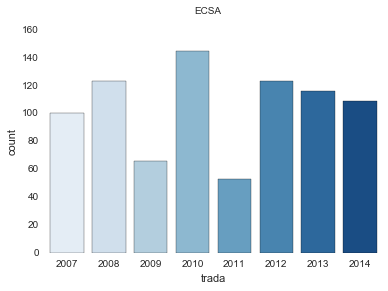

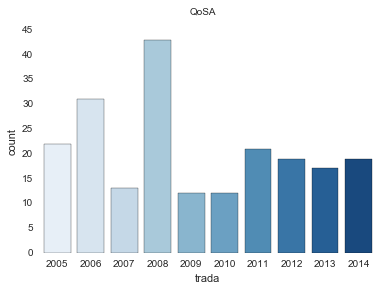

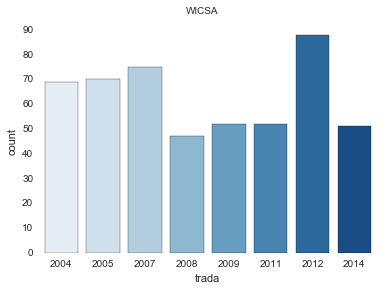

In [5]:
g, df, s = getContentsconf()

# Trying HeatMap

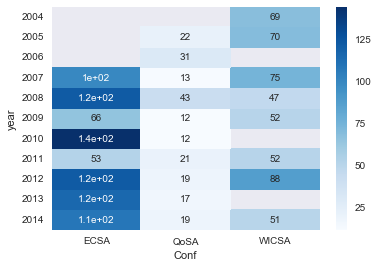

In [6]:
df = df.groupby(['Conf', 'year'])['Conf'].count().reset_index(name="counts")
y = sns.heatmap(df.pivot_table(index='year', columns='Conf', values='counts'),
                                             cmap = 'Blues', annot = True)


# Papers and Their Keywords
- search by Keyword - get paperIds, conf, years, link to HEATMAP of count over the years/conferences



In [7]:
def getPapersKWgroup(grouper):
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        kwdf = pd.read_sql_query(sqlcmd2, con)
        kwdf['keyword'] = kwdf['keyword'].apply(lambda word: eval(word))
        
        merged = kwdf.merge(paperdf, on = 'paperID')
        
        subgrp = merged.groupby(grouper)
        
        return merged, subgrp



def confYrKeywords(top = 10):
    grouper = ['confName', 'pubYear']
    m, f = getPapersKWgroup(grouper)
    myentries = []
    for group in f.groups.keys():
        #print group
        keywordcts = f.get_group((group)).groupby(["keyword"])["keyword"].count()
        
        kwdftop = keywordcts.sort_values(ascending = False).head(top)
        
        resetKW = pd.DataFrame(kwdftop).rename(columns = {'keyword' : 'count'})
        entry = {}
        entry['Group'] = group
        
        entry['Pie'] = getPieOne(resetKW, group)
        entry['Counts'] = resetKW.to_html()
        
        myentries.append(entry)
    
    return dict(data = myentries)

    

def getKWTRends(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    def findKWTrend(df, KWgrouper = ["pubYear", "confName"]):

        df = df.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
        
        try:
            return getHeatMap(df)
        except:
            return 'no data'
        
    
    image = findKWTrend(new)
    image2 =  getSpot(new, KWgrouper = ["pubYear", "confName"])
    
    myentry = [{'table' : data_frame.to_html(),
                'trend'  : image, 
                'sizes' : image2
               }]
    
    return dict(data = myentry)

def seeKWTop20(top = 20):
    m, f = getPapersKWgroup('keyword')
    
    topWds = f.count().sort_values(by = 'confName', ascending = False)[:top]
    
    mTop20 = m[m['keyword'].isin(topWds.index)]
    
    mTop20['counts'] = mTop20.groupby(['confName', 'pubYear', 'keyword'])['keyword'].transform('count')
    
    image = getHeatMap(mTop20, indexCol='keyword', cols = ['confName', 'pubYear'], vals = 'counts', annott = False)
    
    topWds.reset_index(inplace = True)
    topWds.rename(columns = {'confName' : 'OverallCount'}, inplace = True)
    cts = topWds[['keyword', 'OverallCount']]
    
    
    
    return dict(data = 
                        {'Top20' : cts,
                       'HeatMap' : image})
                    

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


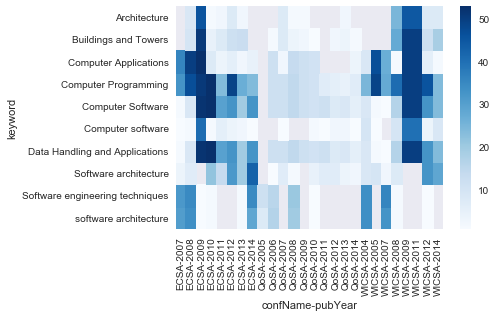

In [8]:
h = seeKWTop20(top = 10)


/Users/aileennovero1/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


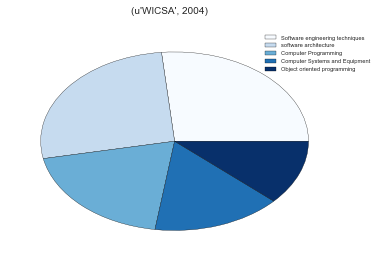

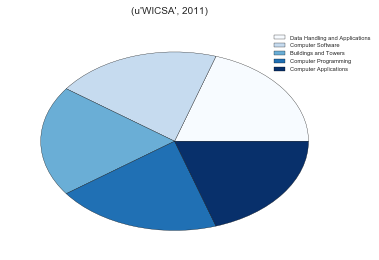

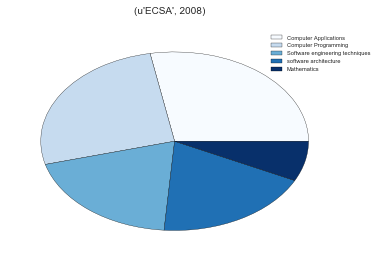

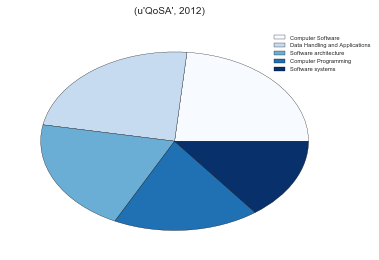

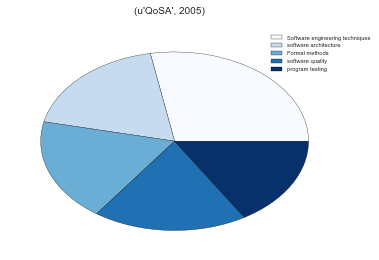

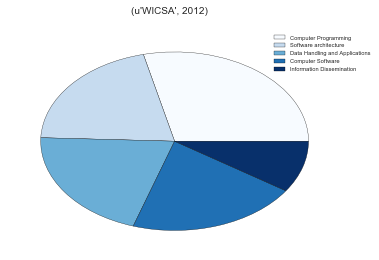

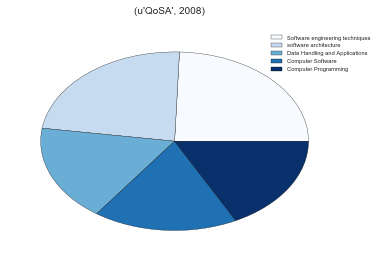

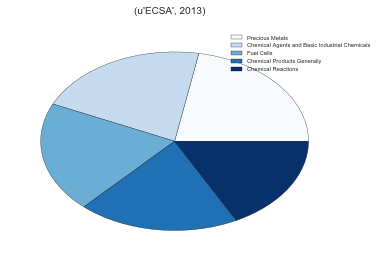

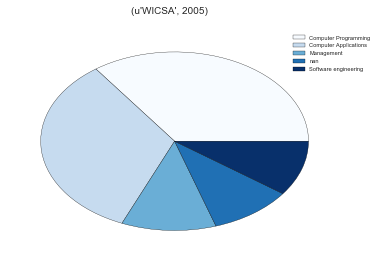

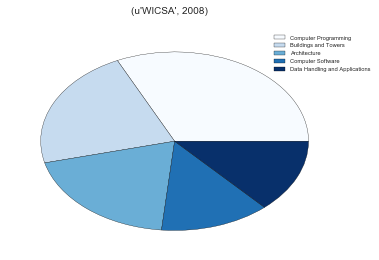

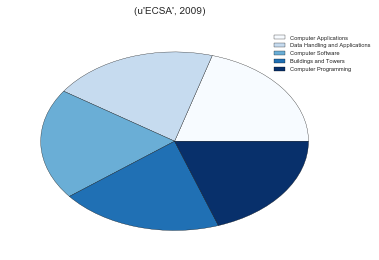

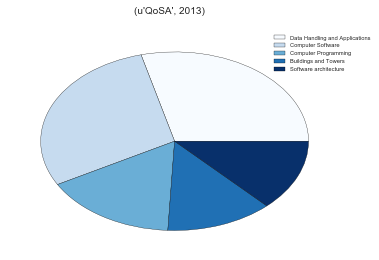

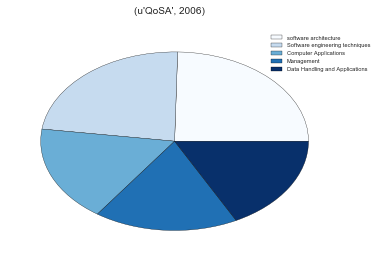

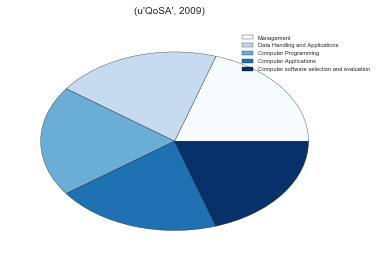

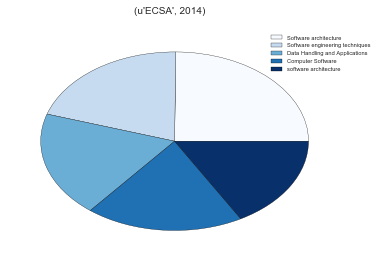

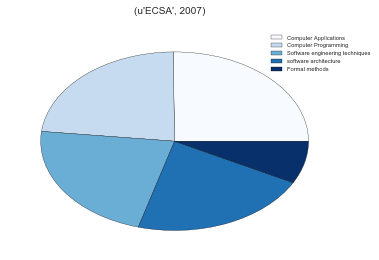

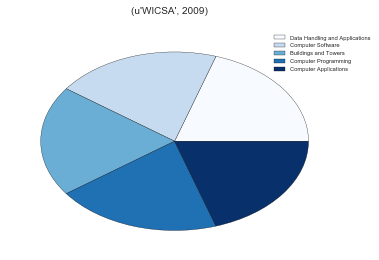

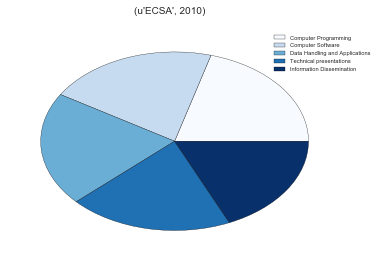

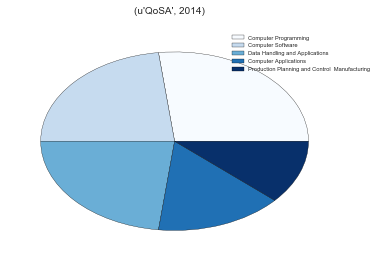

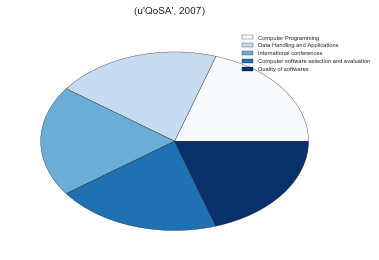

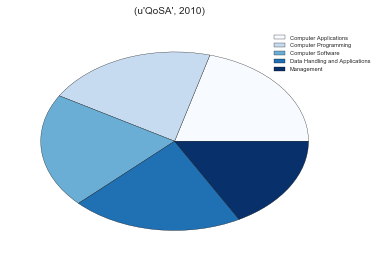

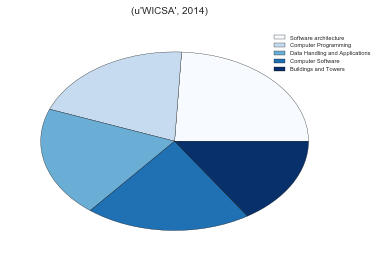

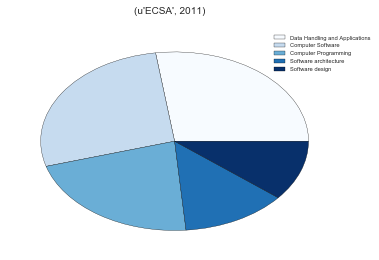

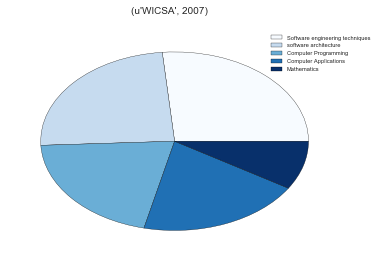

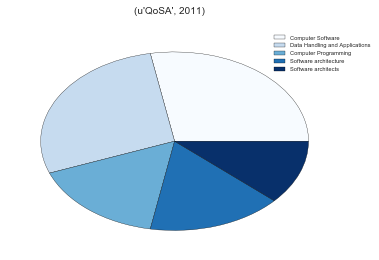

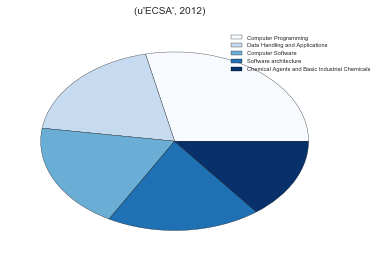

In [9]:
tryit = confYrKeywords(top = 5)

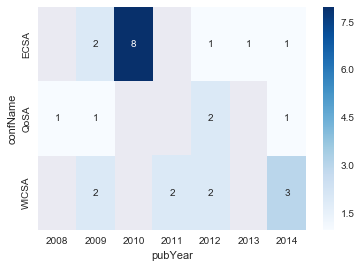

In [10]:
t = getKWTRends('Research', 'keyword')

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


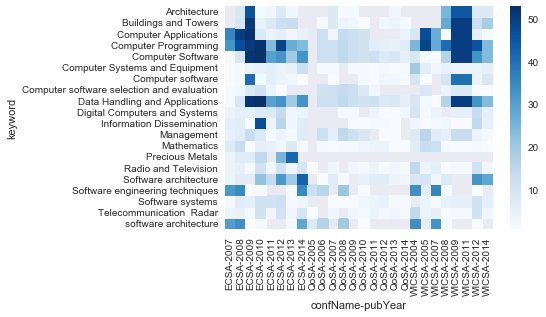

In [11]:
f = seeKWTop20()
#keys = np.array(f['data']['Top20'].keyword)
#keys.sort()
#keys

# Merging Papers and Authors!  YAYAYAYAYA!!!!

In [83]:
def getPaperAuthorMerge():
    
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT * FROM PAPERAUTHOR"
        
        papaudf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID,title,confName, pubYear FROM PAPER"
        
        pap  = pd.read_sql_query(sqlcmd2, con)
        
        merged = papaudf.merge(pap, on =  'paperID')
        
        merged['counts'] = merged.groupby(['authorName'])['authorName'].transform('count')
        
        ap = merged.sort_values(by = ['counts','authorName'], ascending = False)
        
        entries = []
        for row in ap.as_matrix():
            entry = {key: value for (key, value) in zip(ap.columns, row)}
            entries.append(entry)
        return dict(data = entries)  , ap 

def confYrAuthor():
    grouper = ['confName', 'pubYear']
    m, f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    testgroup = f.groupby(grouper)
    
    myentries = []
    for group in testgroup.groups.keys():
        authorcts = testgroup.get_group((group)).groupby(["authorName"])["authorName"].count()
        
        resetAU = pd.DataFrame(authorcts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        mer = pd.merge(resetAU, testgroup.get_group((group)))
            
        entry = {}
        entry['Group'] = group
        entry['AuthorsPapers'] = mer
        
        
        myentries.append(entry)
    
    return dict(data = myentries)
            
def getauthorsbyID(paperID):
    m, df2 = getPaperAuthorMerge()
    dframe = df2
    query = 'paperID == %d' %paperID
    return dframe.query(query)

def getauthorsbyName(author):
    m, df2 = getPaperAuthorMerge()
    dframe = df2[df2['authorName'].str.contains(author)==True]
    #query = 'authorName == "%s"' %author
    return dframe


In [80]:
au = 'author'

'AUTHOR'

In [84]:
#dictionary, df2 = getPaperAuthorMerge()
getauthorsbyName('Van')

paperID                 authorName  \
46         13            Van Vliet  Hans   
50         14            Van Vliet  Hans   
392       103            Van Vliet  Hans   
516       148            Van Vliet  Hans   
519       149            Van Vliet  Hans   
910       260            Van Vliet  Hans   
1100      316            Van Vliet  Hans   
1245      370            Van Vliet  Hans   
1248      371            Van Vliet  Hans   
1540      454            Van Vliet  Hans   
1601      477            Van Vliet  Hans   
1852      555            Van Vliet  Hans   
1855      556            Van Vliet  Hans   
1881      568            Van Vliet  Hans   
2148      647            Van Vliet  Hans   
2633      802            Van Vliet  Hans   
2635      803            Van Vliet  Hans   
2637      804            Van Vliet  Hans   
2902      886            Van Vliet  Hans   
4248     1233            Van Vliet  Hans   
4252     1234            Van Vliet  Hans   
4256     1235            Van Vliet  Hans   
4486     1299            Van Vliet  Hans   
3226      991         Van Den Broek  Pim   
3240      992         Van Den Broek  Pim   
3254      993         Van Den Broek  Pim   
3756     1140         Van Den Broek  Pim   
1633      488            Van Heesch  Uwe   
1636      489            Van Heesch  Uwe   
2881      879            Van Heesch  Uwe   
171        42          Van Deursen  Arie   
669       194          Van Deursen  Arie   
4803     1398          Van Deursen  Arie   
355        93            Van Vliet  Hans   
359        94            Van Vliet  Hans   
522       150            Van Vliet  Hans   
1549      458       Van Landuyt  Dimitri   
1552      459       Van Landuyt  Dimitri   
1244      370         Van Der Raadt  Bas   
1246      371         Van Der Raadt  Bas   
457       126               Van Zee  J W   
2797      853        Van Veelen  Martijn   
551       160            Van Hoorn  Andr   
2485      752              Van Erk  Rene   
2191      661          Van Drunen  Julia   
2887      881  Van Der Ven  Jan Salvador   
1466      433           Van Der Ven  Jan   
1446      429    Van Den Brand  Mark G J   
631       184      Van Den Brand  Mark G   
2394      730        Van Den Brand  Mark   
3025      930          Van Den Berk  Ivo   
3265      996          Chiprianov  Vanea   
3341     1016      Van Der Walt  Marthie   
2409      733        Van Der Merwe  Alta   
3658     1105      Vancouver  BC  Canada   

                                                  title confName  pubYear  \
46    Ontology based software architecture documenta...     ECSA     2012   
50    Ontology based software architecture documenta...    WICSA     2012   
392                              The lonesome architect     ECSA     2009   
516   Building up and reasoning about architectural ...     QoSA     2006   
519   Building up and exploiting architectural knowl...    WICSA     2005   
910   A systematic review of system of systems archi...     QoSA     2013   
1100       Architectural knowledge  Getting to the core     QoSA     2007   
1245     Designing the enterprise architecture function     QoSA     2008   
1248  Stakeholder perception of enterprise architecture     ECSA     2008   
1540  A Just In Time architectural knowledge sharing...    WICSA     2008   
1601     Software architecture education session report    WICSA     2005   
1852  Effective tool support for architectural knowl...     ECSA     2007   
1855  Effective tool support for architectural knowl...     ECSA     2008   
1881  Design reasoning improves software design quality     QoSA     2008   
2148  Assessing a multi site development organizatio...    WICSA     2007   
2633  Modeling constraints improves software archite...     ECSA     2009   
2635  Modeling constraints improves software archite...    WICSA     2009   
2637  Modeling constraints improves software archite...    WICSA     2011   
2902                            The architect s mindset     QoSA     2007   
4

In [14]:
df2.head(40)

paperID       authorName  \
46         13  Van Vliet  Hans   
50         14  Van Vliet  Hans   
392       103  Van Vliet  Hans   
516       148  Van Vliet  Hans   
519       149  Van Vliet  Hans   
910       260  Van Vliet  Hans   
1100      316  Van Vliet  Hans   
1245      370  Van Vliet  Hans   
1248      371  Van Vliet  Hans   
1540      454  Van Vliet  Hans   
1601      477  Van Vliet  Hans   
1852      555  Van Vliet  Hans   
1855      556  Van Vliet  Hans   
1881      568  Van Vliet  Hans   
2148      647  Van Vliet  Hans   
2633      802  Van Vliet  Hans   
2635      803  Van Vliet  Hans   
2637      804  Van Vliet  Hans   
2902      886  Van Vliet  Hans   
4248     1233  Van Vliet  Hans   
4252     1234  Van Vliet  Hans   
4256     1235  Van Vliet  Hans   
4486     1299  Van Vliet  Hans   
209        51  Avgeriou  Paris   
423       114  Avgeriou  Paris   
427       115  Avgeriou  Paris   
431       116  Avgeriou  Paris   
537       155  Avgeriou  Paris   
539       156  Avgeriou  Paris   
558       162  Avgeriou  Paris   
592       172  Avgeriou  Paris   
619       180  Avgeriou  Paris   
1467      433  Avgeriou  Paris   
1634      488  Avgeriou  Paris   
1637      489  Avgeriou  Paris   
1936      585  Avgeriou  Paris   
1938      586  Avgeriou  Paris   
2142      645  Avgeriou  Paris   
2551      772  Avgeriou  Paris   
2796      853  Avgeriou  Paris   

                                                  title confName  pubYear  \
46    Ontology based software architecture documenta...     ECSA     2012   
50    Ontology based software architecture documenta...    WICSA     2012   
392                              The lonesome architect     ECSA     2009   
516   Building up and reasoning about architectural ...     QoSA     2006   
519   Building up and exploiting architectural knowl...    WICSA     2005   
910   A systematic review of system of systems archi...     QoSA     2013   
1100       Architectural knowledge  Getting to the core     QoSA     2007   
1245     Designing the enterprise architecture function     QoSA     2008   
1248  Stakeholder perception of enterprise architecture     ECSA     2008   
1540  A Just In Time architectural knowledge sharing...    WICSA     2008   
1601     Software architecture education session report    WICSA     2005   
1852  Effective tool support for architectural knowl...     ECSA     2007   
1855  Effective tool support for architectural knowl...     ECSA     2008   
1881  Design reasoning improves software design quality     QoSA     2008   
2148  Assessing a multi site development organizatio...    WICSA     2007   
2633  Modeling constraints improves software archite...     ECSA     2009   
2635  Modeling constraints improves software archite...    WICSA     2009   
2637  Modeling constraints improves software archite...    WICSA     2011   
2902                            The architect s mindset     QoSA     2007   
4248  Ontology driven visualization of architectural...     ECSA     2009   
4252  Ontology driven visualization of architectural...    WICSA     2009   
4256  Ontology driven visualization of architectural...    WICSA     2011   
4486  Successful architectural knowledge sharing  Be...     QoSA     2009   
209   Empirically grounded reference architectures  ...     QoSA     2011   
423   Defining execution viewpoints for a large and ...     ECSA     2009   
427   Defining execution viewpoints for a large and ...    WICSA     2009   
431   Defining execution viewpoints for a large and ...    WICSA     2011   
537   Mining relationships between the participants ...     ECSA     2010   
539   Modeling architectural patterns  behavior usin...     ECSA     2008   
558   An empirical investigation of modularity metri...     QoSA     2014   
592   Industrial implementation of a documentation f...    WICSA     2014   
619   Design and evaluation of a process for identif...     ECSA     2011   
1467           Tool support for architectural decisions    WICSA     2

In [15]:
authByID = getauthorsbyID(9)
authByID

paperID         authorName  \
31        9      Garlan  David   
32        9   Schmerl  Bradley   
33        9  Steenkiste  Peter   
30        9    Huang  An Cheng   
29        9   Cheng  Shang Wen   

                                                title confName  pubYear  \
31  An architecture for coordinating multiple self...    WICSA     2004   
32  An architecture for coordinating multiple self...    WICSA     2004   
33  An architecture for coordinating multiple self...    WICSA     2004   
30  An architecture for coordinating multiple self...    WICSA     2004   
29  An architecture for coordinating multiple self...    WICSA     2004   

    counts  
31      14  
32       7  
33       1  
30       1  
29       1

In [85]:
authByName = getauthorsbyName("Schmerl")
authByName

paperID         authorName  \
32          9   Schmerl  Bradley   
433       117   Schmerl  Bradley   
896       256   Schmerl  Bradley   
1529      452   Schmerl  Bradley   
2398      731   Schmerl  Bradley   
2813      860   Schmerl  Bradley   
4417     1278   Schmerl  Bradley   
635       185   Schmerl  Bradley   
639       186   Schmerl  Bradley   
643       187   Schmerl  Bradley   
37         10         Schmerl  B   
2403      732         Schmerl  B   

                                                  title confName  pubYear  \
32    An architecture for coordinating multiple self...    WICSA     2004   
433         Architecture based run time fault diagnosis     ECSA     2011   
896   An architectural approach to end user orchestr...     ECSA     2011   
1529  Semi automated incremental synchronization bet...    WICSA     2005   
2398  Understanding tradeoffs among different archit...    WICSA     2004   
2813  Architecture based self protecting software sy...     QoSA     2013   
4417  uDesign  End user design applied tomonitoring ...    WICSA     2008   
635   Evolution styles  Foundations and tool support...     ECSA     2009   
639   Evolution styles  Foundations and tool support...    WICSA     2009   
643   Evolution styles  Foundations and tool support...    WICSA     2011   
37    An architecture for coordinating multiple self...    WICSA     2004   
2403  Understanding tradeoffs among different archit...    WICSA     2004   

      counts  
32         7  
433        7  
896        7  
1529       7  
2398       7  
2813       7  
4417       7  
635        3  
639        3  
643        3  
37         2  
2403       2

In [17]:
def confYrAuthor():
    grouper = ['confName', 'pubYear']
    m, f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    testgroup = f.groupby(grouper)
    
    myentries = []
    for group in testgroup.groups.keys():
        authorcts = testgroup.get_group((group)).groupby(["authorName"])["authorName"].count()
        
        resetAU = pd.DataFrame(authorcts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        mer = pd.merge(resetAU, testgroup.get_group((group)))
            
        entry = {}
        entry['Group'] = group
        entry['mer'] = mer
        
        
        myentries.append(entry)
    
    return myentries
        
#@App.route('/confyrAuthor_bd/<conf>/<year>', methods=('GET',))
def confYrAuthor2(conf, year):
    grouper = ['confName', 'pubYear']
    d,f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    group = f.groupby(grouper)
    
    try:
        print (conf, year)
        subgroup =  group.get_group((conf, year))
                                  
        print ('subgroupmade')
        cts = subgroup.groupby(["authorName"])["authorName"].count()
        
            
        resetAU = pd.DataFrame(cts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        merged = pd.merge(resetAU, subgroup)

        mytable = []
        for idx in merged.index.get_values():
            entry = {}
            entry['Author'] = merged.loc[idx]['authorName']
            entry['paperID'] = merged.loc[idx]['paperID']
            entry['Title'] = merged.loc[idx]['title']
            entry['AuthorYrCount'] = merged.loc[idx]['IndivCt']    
            
            mytable.append(entry)
        
        return dict(data = mytable)
    
    except:
        print('Conference Year error')
        mytable = {entry['Author'] : 'No Conference Data',
                   entry['paperID'] : 'No Conference Data',
                   entry['Title'] : 'No Conference Data',
                   entry['AuthorYrCount'] : 'No Conference Data'
                   }
        return dict(data = mytable)
 


In [18]:
d = confYrAuthor2('WICSA', 2004)

('WICSA', 2004)
subgroupmade


In [19]:
d  
           

{'data': [{'Author': u' Aigner  R',
   'AuthorYrCount': 1,
   'Title': u'The COMQUAD component container architecture',
   'paperID': 240},
  {'Author': u' America  P',
   'AuthorYrCount': 2,
   'Title': u'Component replacement in a long living architecture  the 3RDBA approach',
   'paperID': 447},
  {'Author': u' America  P',
   'AuthorYrCount': 2,
   'Title': u'A scenario driven approach for value, risk, and cost analysis in system architecting for innovation',
   'paperID': 1407},
  {'Author': u' America  Pierre',
   'AuthorYrCount': 2,
   'Title': u'Component replacement in a long living architecture  The 3RDBA approach',
   'paperID': 448},
  {'Author': u' America  Pierre',
   'AuthorYrCount': 2,
   'Title': u'A scenario driven approach for value, risk, and cost analysis in system architecting for innovation',
   'paperID': 1408},
  {'Author': u' Andersson  J',
   'AuthorYrCount': 1,
   'Title': u'Real world influences on software architecture   interviews with industrial system e

In [20]:
rr = confYrAuthor()

In [21]:
print rr[0]['Group']

gg = rr[0]['mer']

(u'WICSA', 2004)


In [22]:
gg.head(20)

authorName  IndivCt  paperID  \
0             Aigner  R        1      240   
1            America  P        2      447   
2            America  P        2     1407   
3       America  Pierre        2      448   
4       America  Pierre        2     1408   
5          Andersson  J        1      535   
6    Balasubramaniam  D        1      967   
7               Bass  L        1      136   
8              Bonta  E        1      650   
9            Brown  T J        2      543   
10           Brown  T J        2      544   
11     Christensen  H B        2       37   
12     Christensen  H B        2     1480   
13            Cimpan  S        1      967   
14        Crichton  D J        1     1202   
15   Crichton  Daniel J        1     1203   
16          Crnkovic  I        1      535   
17   De With  Peter H N        1       33   
18            Desmet  L        1      807   
19             Egyed  A        1      894   

                                                title confName  pubYear  \
0        The COMQUAD component container architecture    WICSA     2004   
1   Component replacement in a long living archite...    WICSA     2004   
2   A scenario driven approach for value, risk, an...    WICSA     2004   
3   Component replacement in a long living archite...    WICSA     2004   
4   A scenario driven approach for value, risk, an...    WICSA     2004   
5   Real world influences on software architecture...    WICSA     2004   
6   Support for evolving software architectures in...    WICSA     2004   
7   Experience using an expert system to assist an...    WICSA     2004   
8   Generating well synchronized multithreaded pro...    WICSA     2004   
9   A network architectural style for real time sy...    WICSA     2004   
10  A network architectural style for real time sy...    WICSA     2004   
11  Architectural prototyping  an approach for gro...    WICSA     2004   
12  Real time collaboration in activity based arch...    WICSA     2004   
13  Support for evolving software architectures in...    WICSA     2004   
14  Software architecture for large scale, distrib...    WICSA     2004   
15  Software architecture for large scale, distrib...    WICSA     2004   
16  Real world influences on software architecture...    WICSA     2004   
17  Resolving requirement conflicts through non fu...    WICSA     2004   
18  The DiPS  software architecture for self heali...    WICSA     2004   
19  An externalized infrastructure for self healin...    WICSA     2004   

    counts  
0        1  
1        2  
2        2  
3        4  
4        4  
5        1  
6        5  
7        4  
8        1  
9        2  
10       2  
11       4  
12       4  
13       1  
14       1  
15       1  
16       3  
17       1  
18       1  
19       1

In [23]:
ids = np.array(df2.paperID)
yrs = np.array(df2.pubYear)
cts = np.array(df2.counts)*10

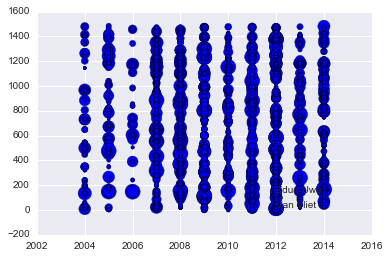

In [24]:
plt.scatter(yrs, ids, s = cts)
plt.text(2012, 140, 'Zdun Uwe')
plt.text(2012, 13, 'Van Vliet')

In [25]:
labels = {'WICSA' :1 ,
         'ECSA' : 2,
         'QoSA' : 3}
    
    

In [26]:
def testspot(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    KWgrouper = ["pubYear", "confName"]

    df = getSpot(new, KWgrouper)
    return df
    
    

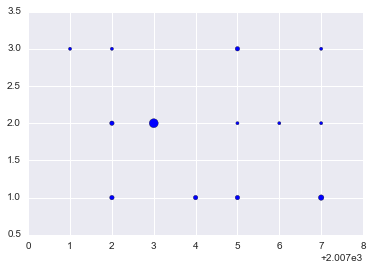

In [27]:
d = testspot('Research', 'keyword')

In [29]:
from difflib import SequenceMatcher


In [30]:
m = SequenceMatcher(None, "NEW YORK METS", "NEW YORK MEATS")


In [32]:
m.ratio()

0.9629629629629629

In [44]:
name = 'van'
df2.head()

paperID       authorName  \
46        13  Van Vliet  Hans   
50        14  Van Vliet  Hans   
392      103  Van Vliet  Hans   
516      148  Van Vliet  Hans   
519      149  Van Vliet  Hans   

                                                 title confName  pubYear  \
46   Ontology based software architecture documenta...     ECSA     2012   
50   Ontology based software architecture documenta...    WICSA     2012   
392                             The lonesome architect     ECSA     2009   
516  Building up and reasoning about architectural ...     QoSA     2006   
519  Building up and exploiting architectural knowl...    WICSA     2005   

     counts  
46       23  
50       23  
392      23  
516      23  
519      23

In [48]:
test = df2[df2['authorName'].str.contains("Van")==True]

In [49]:
test

paperID                 authorName  \
46         13            Van Vliet  Hans   
50         14            Van Vliet  Hans   
392       103            Van Vliet  Hans   
516       148            Van Vliet  Hans   
519       149            Van Vliet  Hans   
910       260            Van Vliet  Hans   
1100      316            Van Vliet  Hans   
1245      370            Van Vliet  Hans   
1248      371            Van Vliet  Hans   
1540      454            Van Vliet  Hans   
1601      477            Van Vliet  Hans   
1852      555            Van Vliet  Hans   
1855      556            Van Vliet  Hans   
1881      568            Van Vliet  Hans   
2148      647            Van Vliet  Hans   
2633      802            Van Vliet  Hans   
2635      803            Van Vliet  Hans   
2637      804            Van Vliet  Hans   
2902      886            Van Vliet  Hans   
4248     1233            Van Vliet  Hans   
4252     1234            Van Vliet  Hans   
4256     1235            Van Vliet  Hans   
4486     1299            Van Vliet  Hans   
3226      991         Van Den Broek  Pim   
3240      992         Van Den Broek  Pim   
3254      993         Van Den Broek  Pim   
3756     1140         Van Den Broek  Pim   
1633      488            Van Heesch  Uwe   
1636      489            Van Heesch  Uwe   
2881      879            Van Heesch  Uwe   
171        42          Van Deursen  Arie   
669       194          Van Deursen  Arie   
4803     1398          Van Deursen  Arie   
355        93            Van Vliet  Hans   
359        94            Van Vliet  Hans   
522       150            Van Vliet  Hans   
1549      458       Van Landuyt  Dimitri   
1552      459       Van Landuyt  Dimitri   
1244      370         Van Der Raadt  Bas   
1246      371         Van Der Raadt  Bas   
457       126               Van Zee  J W   
2797      853        Van Veelen  Martijn   
551       160            Van Hoorn  Andr   
2485      752              Van Erk  Rene   
2191      661          Van Drunen  Julia   
2887      881  Van Der Ven  Jan Salvador   
1466      433           Van Der Ven  Jan   
1446      429    Van Den Brand  Mark G J   
631       184      Van Den Brand  Mark G   
2394      730        Van Den Brand  Mark   
3025      930          Van Den Berk  Ivo   
3265      996          Chiprianov  Vanea   
3341     1016      Van Der Walt  Marthie   
2409      733        Van Der Merwe  Alta   
3658     1105      Vancouver  BC  Canada   

                                                  title confName  pubYear  \
46    Ontology based software architecture documenta...     ECSA     2012   
50    Ontology based software architecture documenta...    WICSA     2012   
392                              The lonesome architect     ECSA     2009   
516   Building up and reasoning about architectural ...     QoSA     2006   
519   Building up and exploiting architectural knowl...    WICSA     2005   
910   A systematic review of system of systems archi...     QoSA     2013   
1100       Architectural knowledge  Getting to the core     QoSA     2007   
1245     Designing the enterprise architecture function     QoSA     2008   
1248  Stakeholder perception of enterprise architecture     ECSA     2008   
1540  A Just In Time architectural knowledge sharing...    WICSA     2008   
1601     Software architecture education session report    WICSA     2005   
1852  Effective tool support for architectural knowl...     ECSA     2007   
1855  Effective tool support for architectural knowl...     ECSA     2008   
1881  Design reasoning improves software design quality     QoSA     2008   
2148  Assessing a multi site development organizatio...    WICSA     2007   
2633  Modeling constraints improves software archite...     ECSA     2009   
2635  Modeling constraints improves software archite...    WICSA     2009   
2637  Modeling constraints improves software archite...    WICSA     2011   
2902                            The architect s mindset     QoSA     2007   
4

In [100]:
import pycountry

In [149]:

def getAffiliation():
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, affiliation, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        #sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        #kwdf = pd.read_sql_query(sqlcmd2, con)
        #kwdf['keyword'] = kwdf['keyword'].apply(lambda word: eval(word))
        
        #merged = kwdf.merge(paperdf, on = 'paperID')
        
        #subgrp = merged.groupby(grouper)
        
        return paperdf

def searchAffiliation(country):
    #countries = [c.name for c in pycountry.countires]
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, affiliation, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        datadf = paperdf[paperdf['affiliation'].str.contains(country or country.lower())==True]
        
        mytable = []
        for idx in datadf.index.get_values():
            entry = {}
            entry['paperID'] = datadf.loc[idx]['paperID']
            entry['affiliation'] = datadf.loc[idx]['affiliation']
            html2 = "http://127.0.0.1:5000/PaperID/"+ str(datadf.loc[idx]['paperID'])
            entry['getPaper'] =  "<a href='%s'<button>getPaper</button>></a>" %html2  
            
            mytable.append(entry)
        
        return jsonify(dict(data = mytable))
        

In [143]:

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d


'''
                                                TOTAL TABLES
''' 
def getPaper(id):
    '''Return Jsonified table SELECT *'''
    
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear, abstract FROM PAPER WHERE paperID == %d" %id
        con.row_factory = dict_factory
        cur = con.cursor()
        cur.execute(sqlcmd)
        entries = cur.fetchall()
        #data = {'data' : entries}
        #df = pd.read_sql_query(sqlcmd, con)
    return jsonify(dict(data=entries))



In [138]:
def getPaper(id):
    #countries = [c.name for c in pycountry.countires]
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear, abstract FROM PAPER WHERE paperID == %d" %id
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        return paperdf

In [150]:
aff2, aff2df = searchAffiliation('United')

In [151]:
aff2

{'data': [{'affiliation': u'Sch  of Comput  Sci , Carnegie Mellon Univ , Pittsburgh, PA, United States',
   'getPaper': "<a href='http://127.0.0.1:5000/PaperID/10'<button>getPaper</button>></a>",
   'paperID': 10},
  {'affiliation': u'Department of Computer Science, University of Leicester, University Road, Leicester LE1 7RH, United Kingdom  2  Computing Department, Open University, Walton Hall, Milton Keynes MK7 6AA, United Kingdom',
   'getPaper': "<a href='http://127.0.0.1:5000/PaperID/11'<button>getPaper</button>></a>",
   'paperID': 11},
  {'affiliation': u'Dept  of Comput  Sci , Univ  of Leicester, Leicester, United Kingdom',
   'getPaper': "<a href='http://127.0.0.1:5000/PaperID/12'<button>getPaper</button>></a>",
   'paperID': 12},
  {'affiliation': u'Department of Chemical and Biomolecular Engineering, University of Houston, Houston, TX 77204, United States  2  Institut fuer Chemie, Technische Universitaet Berlin, 10623 Berlin, Germany',
   'getPaper': "<a href='http://127.0.0

In [139]:
paper = getPaper(13)

In [144]:
paper2, paper2df = getjsonTotal(13)

In [146]:
paper2

{'data': [{'abstract': u'A common approach to software architecture documentation in industry projects is the use of file based documents  This approach offers a single dimensional perspective on the architectural knowledge contained  Knowledge retrieval from file based architecture documentation is efficient if the perspective chosen fits the needs of the readers, it is less so if the perspective does not match the needs of the readers  In this paper we describe an approach aimed at addressing architecture documentation retrieval issues  We have employed a software ontology in a semantic wiki optimized for architecture documentation  We have evaluated this ontology based approach in a controlled industry experiment involving software professionals  The efficiency and effectiveness of the proposed approach is found to be better than that of the file based approach    2012 IEEE   29 refs',
   'confName': u'ECSA',
   'paperID': 13,
   'pubYear': 2012,
   'title': u'Ontology based softwar

In [99]:
cc[0]

u'Afghanistan'